In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pycountry
!pip install python-aqi

     |████████████████████████████████| 10.0MB 3.0MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=c69ad7cf923ec28b0eb2058d68697be8ebdd03c266321dbeea89505421cb293e
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
  Created wheel for python-aqi: filename=python_aqi-0.6.1-cp36-none-any.whl size=9661 sha256=57c250f8741be33ae4fb2cd434f4db18b766e039eb469269b1e3741e89312b70
  Stored in directory: /root/.cache/pip/wheels/19/d1/a3/e86a721d62c4ccb26cad2d0900d3c4cdf3f9848215882e0547
Successfully built python-aqi


In [3]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
import os

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)

import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster


# Grafik boyutunu değiştirme
plt.rcParams['figure.figsize'] = 17, 8
plt.style.use("fivethirtyeight")

# Uyarıları devre dışı bırak
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
istasyon_gunluk = pd.read_csv('/content/drive/My Drive/Yapay Zeka/Veriler/istasyonlarin_gunluk_verisi.csv')

In [5]:
display("İstasyonların Günlük Verisi")
display(istasyon_gunluk.head(5))

'İstasyonların Günlük Verisi'

,Istasyon,Tarih,PM10,SO2,CO,NO2,NOX,NO,O3
0,Akcaabat,1/1/2019,33.667655,11.716901,914.801808,33.503359,44.252109,10.748751,29.743932
1,Akcaabat,1/2/2019,65.087444,22.262946,1436.981921,57.587279,95.126121,37.538841,23.427460
2,Akcaabat,1/3/2019,77.366410,19.615486,1322.937491,58.792529,95.409477,36.616948,29.528927
3,Akcaabat,1/4/2019,59.645559,18.239013,1088.972087,52.013013,74.637182,22.624171,31.338699
4,Akcaabat,1/5/2019,32.578143,10.692952,1033.839888,37.565636,48.228990,10.663354,32.689416


In [6]:
#Boş verilere bakalım
istasyon_gunluk.isnull().sum()

Istasyon       0
Tarih          0
PM10         811
SO2          775
CO           670
NO2          578
NOX          577
NO           895
O3          1827
dtype: int64

In [7]:
#Boş verileri o sütundaki değerlerin ortalaması ile dolduracağım.Öncelikle verilerin bir kopyasını alıyorum.
istasyon_gunluk_kopyası = istasyon_gunluk.copy()

In [8]:
#Boş verileri sütunların ortalamaları ile dolduruyorum.
istasyon_gunluk_kopyası=istasyon_gunluk_kopyası.fillna(istasyon_gunluk_kopyası.mean())

In [9]:
#Boş verilere tekrar bakalım çalıştı mı
istasyon_gunluk_kopyası.isnull().sum()

Istasyon    0
Tarih       0
PM10        0
SO2         0
CO          0
NO2         0
NOX         0
NO          0
O3          0
dtype: int64

In [10]:
#Verinin istatistiksel bilgileri
istasyon_gunluk_kopyası.describe().T

,count,mean,std,min,25%,50%,75%,max
PM10,2190.0,40.583165,17.938196,5.121526,30.733152,40.583165,40.583165,154.350897
SO2,2190.0,133.313370,187.872338,0.117878,4.526161,133.313370,133.313370,1069.154817
CO,2190.0,328.556148,348.305171,2.275814,45.162918,328.556148,447.947100,2249.612917
NO2,2190.0,51.688162,33.755625,4.455961,31.418911,51.688162,58.389656,329.748528
NOX,2190.0,41.056698,42.858936,1.406878,19.126774,39.294459,41.056698,354.546128
NO,2190.0,37.359283,28.377852,0.780413,21.450898,37.359283,38.603304,250.304961
O3,2190.0,50.522954,6.821684,10.286362,50.522954,50.522954,50.522954,94.562284


In [11]:
istasyon_gunluk_kopyası.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Istasyon  2190 non-null   object 
 1   Tarih     2190 non-null   object 
 2   PM10      2190 non-null   float64
 3   SO2       2190 non-null   float64
 4   CO        2190 non-null   float64
 5   NO2       2190 non-null   float64
 6   NOX       2190 non-null   float64
 7   NO        2190 non-null   float64
 8   O3        2190 non-null   float64
dtypes: float64(7), object(2)
memory usage: 154.1+ KB


In [12]:
istasyon_gunluk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Istasyon  2190 non-null   object 
 1   Tarih     2190 non-null   object 
 2   PM10      1379 non-null   float64
 3   SO2       1415 non-null   float64
 4   CO        1520 non-null   float64
 5   NO2       1612 non-null   float64
 6   NOX       1613 non-null   float64
 7   NO        1295 non-null   float64
 8   O3        363 non-null    float64
dtypes: float64(7), object(2)
memory usage: 154.1+ KB


In [13]:
# Eksik Değerler
def eksik_degerlerin_tablosu(df):
        # Toplam eksik değer
        eksik_deger = df.isnull().sum()
        
        # Eksik değerlerin yüzdesi
        eksik_deger_yuzdesi = 100 * df.isnull().sum() / len(df)
        
        # Tablo oluşturalım
        eksik_deger_tablosu = pd.concat([eksik_deger, eksik_deger_yuzdesi], axis=1)
        
        # Sütun adı
        eksik_deger_tablo_sütun = eksik_deger_tablosu.rename(
        columns = {0 : 'Eksik Değerler', 1 : '% olarak Toplam Değer'})
        
        # Tabloyu eksik azalan yüzdeye göre sırala
        eksik_deger_tablo_sütun = eksik_deger_tablo_sütun[
            eksik_deger_tablo_sütun.iloc[:,1] != 0].sort_values(
        '% olarak Toplam Değer', ascending=False).round(1)
        
        # Toplanan bilgiyi yazdır
        print ("Seçilen veride " + str(df.shape[1]) + " sütun var.\n"      
            "Eksik değerleri olan " + str(eksik_deger_tablo_sütun.shape[0]) +
              " sütun vardır.")
        
        # Eksik verileri döndür
        return eksik_deger_tablo_sütun

eksik_degerler= eksik_degerlerin_tablosu(istasyon_gunluk)
eksik_degerler.style.background_gradient(cmap='Reds')

Seçilen veride 9 sütun var.
Eksik değerleri olan 7 sütun vardır.


,Eksik Değerler,% olarak Toplam Değer
O3,1827,83.400000
NO,895,40.900000
PM10,811,37.000000
SO2,775,35.400000
CO,670,30.600000
NO2,578,26.400000
NOX,577,26.300000


In [14]:
# Stringi tarihe dönüştür
istasyon_gunluk['Tarih'] = pd.to_datetime(istasyon_gunluk['Tarih'])

In [15]:
print(f" {istasyon_gunluk['Tarih'].min()} ve {istasyon_gunluk['Tarih'].max()} tarihleri arasında veri vardır.")

 2019-01-01 00:00:00 ve 2019-12-31 00:00:00 tarihleri arasında veri vardır.


In [16]:
istasyon_gunluk['Partikül Madde'] =istasyon_gunluk['PM10']

In [17]:
maddeler = ['PM10','NO2', 'CO', 'SO2', 'O3', 'NOX', 'NO']

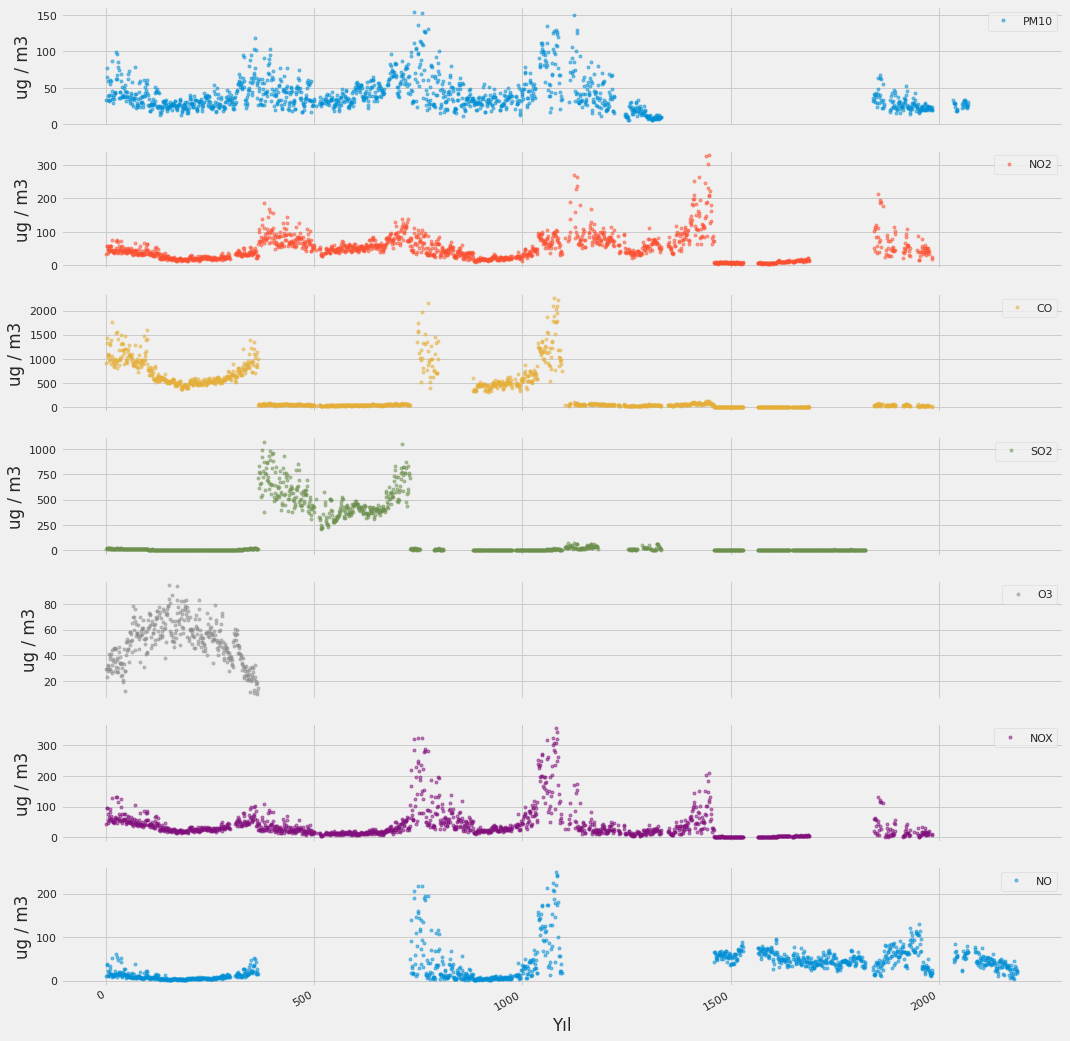

In [18]:
madde_verileri = istasyon_gunluk[maddeler].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for veri in madde_verileri:
    veri.set_xlabel('Yıl')
    veri.set_ylabel('ug / m3')

In [19]:
def egilim_grafigi(df,deger):
    
    df['yıl'] = [d.year for d in df.Tarih]
    df['ay'] = [d.strftime('%b') for d in df.Tarih]
    years = df['yıl'].unique()

    fig, axes = plt.subplots(1, 2, figsize=(20,6), dpi= 80)
    sns.boxplot(x='yıl', y=deger, data=df, ax=axes[0])
    sns.pointplot(x='ay', y=deger, data=df.loc[~df.yıl.isin([2015, 2020]), :])

    axes[0].set_title('Yıllık Kutu Grafiği', fontsize=18); 
    axes[1].set_title('Aylık Grafik', fontsize=18)
    plt.show()


In [20]:
#Şimdi, kutu grafiklerle verilerimizin mevsimselliğini daha ayrıntılı inceleyelim. Verileri farklı 
#zaman aralıklarına göre gruplamak ve her grup için dağılımları göstermek için kutu grafikleri kullanacağız. 
#Verileri yıl ve aya göre gruplandıracağız. Tüm ölçümler ug / m3 şeklindedir.

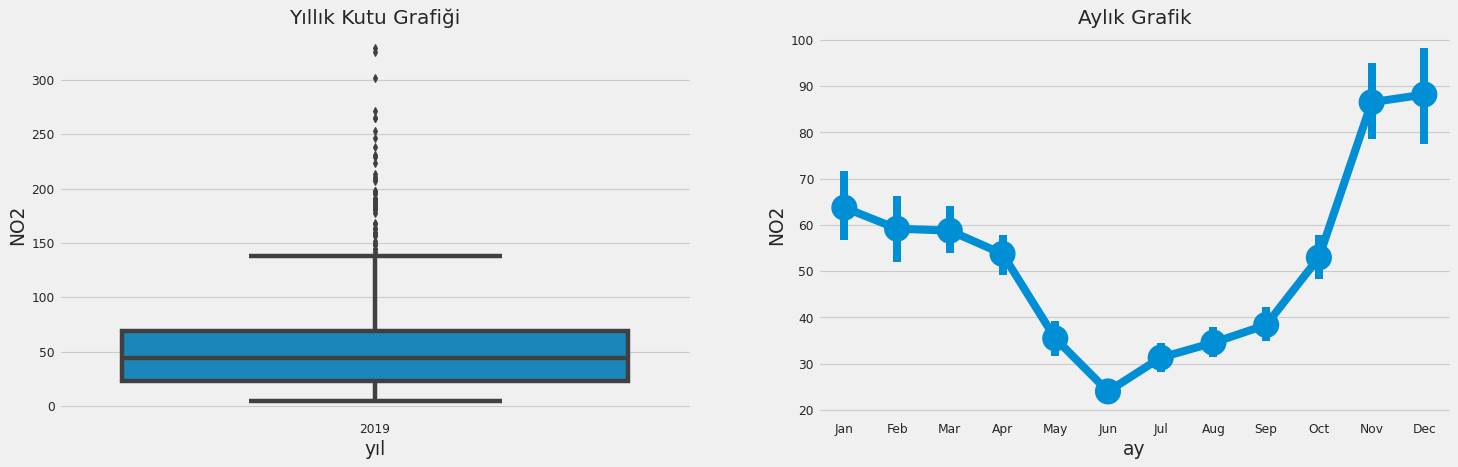

In [21]:
df = istasyon_gunluk.copy()

madde='NO2'
egilim_grafigi(df,madde)


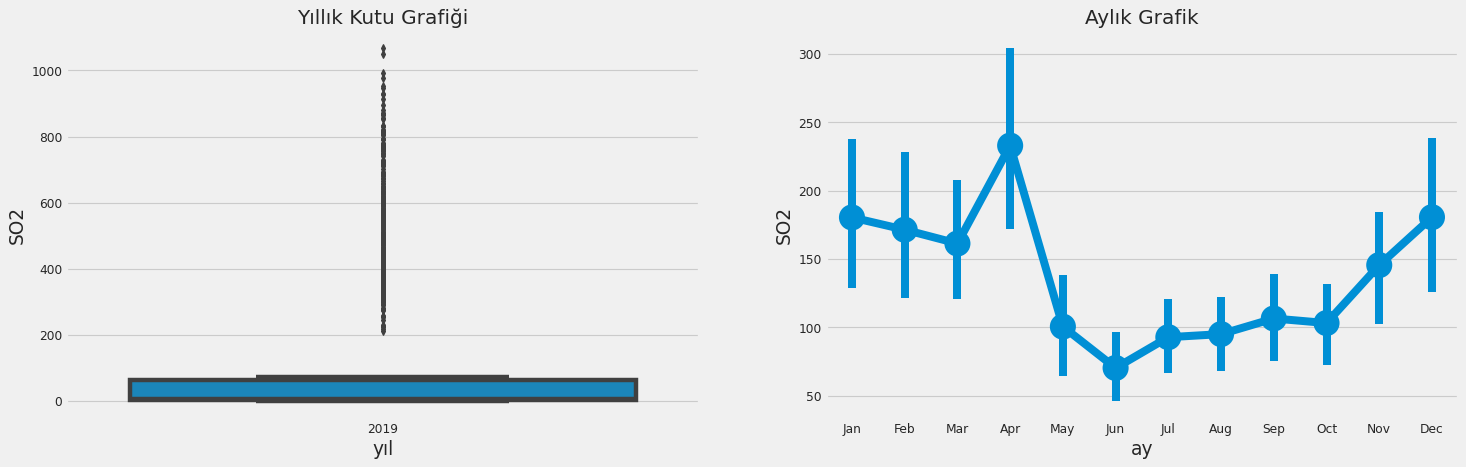

In [22]:
istasyon_gunluk.reset_index(drop=True)
madde='SO2'
egilim_grafigi(df,madde)

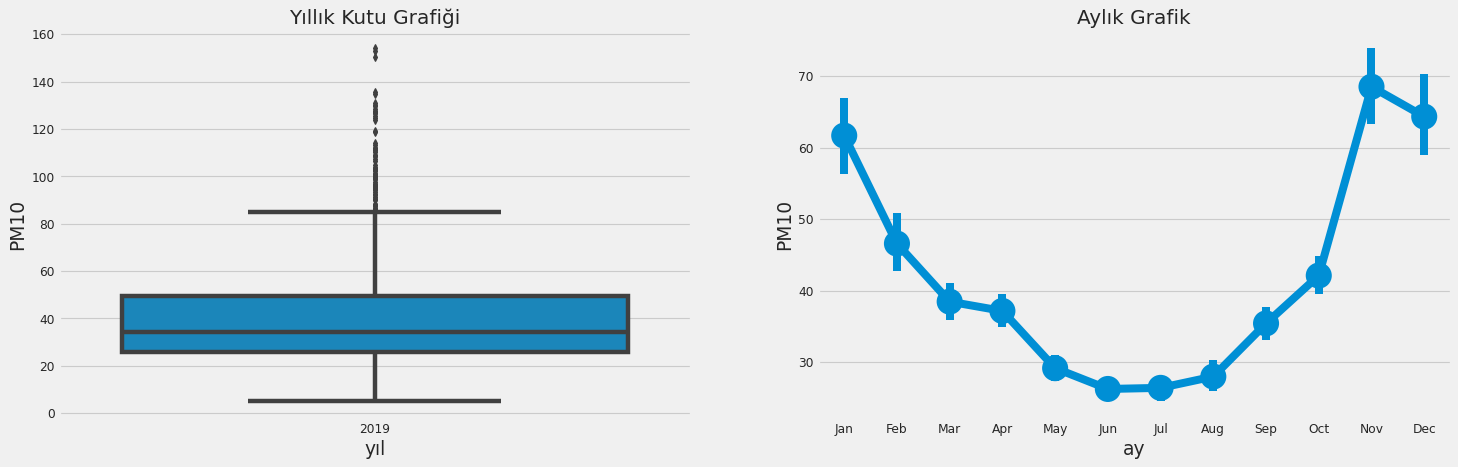

In [23]:
madde='PM10'
egilim_grafigi(df,madde)

In [18]:
#Bundan sonraki hedefim hava kalitesi indeksini hesaplamak ve 2020nin ilk çeyreği hakkında karşılaştırma yapmak
#Daha önceki yıllar ile karşılaştırma yapacağım
#Trabzonun diğer ilçelerini de veri setime ekleyeyeceğim

In [24]:
def en_kirli_istasyon(pollutant):
    x1 = istasyon_gunluk[[pollutant,'Istasyon']].groupby(["Istasyon"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [25]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [26]:
pm10 = en_kirli_istasyon('PM10')
so2 = en_kirli_istasyon('SO2')
co = en_kirli_istasyon('CO')
no2 = en_kirli_istasyon('NO2')
nox = en_kirli_istasyon('NOX')
no = en_kirli_istasyon('NO')
o3 = en_kirli_istasyon('O3')

display_side_by_side(pm10,so2,co,no2,nox,no,o3)

,Istasyon,PM10
0,Fatih,50.090000
1,Besirli,44.500000
2,Akcaabat,37.640000
3,Meydan,32.580000
4,Valilik,28.180000
5,Uzungol,nan
,Istasyon,SO2
0,Besirli,513.330000
1,Meydan,26.490000
2,Akcaabat,8.450000


In [27]:

x2 = istasyon_gunluk[['PM10','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='PM10',ascending=False).reset_index()
x3 = istasyon_gunluk[['SO2','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='SO2',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("PM10","SO2"))

fig.add_trace(go.Bar( y=x2['PM10'], x=x2["Istasyon"],  
                     marker=dict(color=x2['PM10'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x3['SO2'], x=x2["Istasyon"],  
                     marker=dict(color=x3['SO2'], coloraxis="coloraxis")),
              1, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="istasyonlar")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.show()

In [28]:
x4 = istasyon_gunluk[['CO','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='CO',ascending=False).reset_index()
x5 = istasyon_gunluk[['NO2','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='NO2',ascending=False).reset_index()
x6 = istasyon_gunluk[['NOX','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='NOX',ascending=False).reset_index()
x7 = istasyon_gunluk[['NO','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='NO',ascending=False).reset_index()
x8 = istasyon_gunluk[['O3','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='O3',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=("CO","NO2",'NOX','NO','O3'))

fig.add_trace(go.Bar( y=x4['CO'], x=x4["Istasyon"],  
                     marker=dict(color=x4['CO'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar( y=x5['NO2'], x=x5["Istasyon"],  
                     marker=dict(color=x5['NO2'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar( y=x6['NOX'], x=x6["Istasyon"],  
                     marker=dict(color=x6['NOX'], coloraxis="coloraxis")),
              1, 3)

fig.add_trace(go.Bar( y=x7['NO'], x=x7["Istasyon"],  
                     marker=dict(color=x7['NO'], coloraxis="coloraxis")),
              3, 1)

fig.add_trace(go.Bar( y=x8['O3'], x=x8["Istasyon"],  
                     marker=dict(color=x8['O3'], coloraxis="coloraxis")),
              3, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='cyan')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="istasyonlar")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.update_yaxes(title_text="ug / m3", row=2, col=1)
fig.update_yaxes(title_text="ug / m3", row=2, col=2)
fig.show()

In [18]:
# AQI HESAPLA VE AÇIKLAMASINI BULMA

In [29]:
# Hava kalite indeksini PM10'a göre bul
istasyon_gunluk_kopya = istasyon_gunluk.copy()
istasyon_gunluk_kopya=istasyon_gunluk_kopya.fillna(istasyon_gunluk_kopya.mean())
 
import warnings
warnings.filterwarnings('ignore')

import aqi 
uzunluk = len(istasyon_gunluk_kopya)
a = np.zeros(uzunluk)
for i in range(uzunluk):
    myaqi = aqi.to_aqi([
        (aqi.POLLUTANT_PM10, istasyon_gunluk_kopya['PM10'][i])], algo=aqi.ALGO_MEP)
    a[i] = myaqi

def aqi_durumu(x):
    if x <= 50:
        return "İyi"
    elif x <= 100:
        return "Yeterli"
    elif x <= 200:
        return "Orta"
    elif x <= 300:
        return "Kötü"
    elif x <= 400:
        return "Çok Kötü"
    elif x > 400:
        return "Ciddi"
    else:
        return np.NaN
durum = []
for i in range(2190):
    durum.append(aqi_durumu(a[i])) 
 

In [30]:
dataDurumSayi = pd.DataFrame(a)
dataDurumSayi.columns = ['AQI']
dataDurumSayi.head()

,AQI
0,33.0
1,58.0
2,64.0
3,55.0
4,32.0


In [31]:
dataDurum = pd.DataFrame(durum)
dataDurum.columns = ['AQI Açıklaması']
dataDurum.head()

,AQI Açıklaması
0,İyi
1,Yeterli
2,Yeterli
3,Yeterli
4,İyi


In [32]:
dataFrameler = [istasyon_gunluk_kopya, dataDurumSayi, dataDurum]
sonucDataFrame = pd.concat(dataFrameler,axis=1, sort=False)
sonucDataFrame.head()


,Istasyon,Tarih,PM10,SO2,CO,NO2,NOX,NO,O3,Partikül Madde,AQI,AQI Açıklaması
0,Akcaabat,2019-01-01,33.667655,11.716901,914.801808,33.503359,44.252109,10.748751,29.743932,33.667655,33.0,İyi
1,Akcaabat,2019-01-02,65.087444,22.262946,1436.981921,57.587279,95.126121,37.538841,23.427460,65.087444,58.0,Yeterli
2,Akcaabat,2019-01-03,77.366410,19.615486,1322.937491,58.792529,95.409477,36.616948,29.528927,77.366410,64.0,Yeterli
3,Akcaabat,2019-01-04,59.645559,18.239013,1088.972087,52.013013,74.637182,22.624171,31.338699,59.645559,55.0,Yeterli
4,Akcaabat,2019-01-05,32.578143,10.692952,1033.839888,37.565636,48.228990,10.663354,32.689416,32.578143,32.0,İyi


In [33]:
istasyonlar = ['Akcaabat','Besirli','Fatih','Meydan','Uzungol','Valilik']

filtreli_istasyon_gunluk = sonucDataFrame[sonucDataFrame['Tarih'] >= '2019-01-01']
AQI = filtreli_istasyon_gunluk[filtreli_istasyon_gunluk.Istasyon.isin(istasyonlar)][['Tarih','Istasyon','AQI','AQI Açıklaması']]
AQI.head()

,Tarih,Istasyon,AQI,AQI Açıklaması
0,2019-01-01,Akcaabat,33.0,İyi
1,2019-01-02,Akcaabat,58.0,Yeterli
2,2019-01-03,Akcaabat,64.0,Yeterli
3,2019-01-04,Akcaabat,55.0,Yeterli
4,2019-01-05,Akcaabat,32.0,İyi


In [ ]:
AQI_2019_pivot = AQI.pivot(index='Tarih', columns='Istasyon', values='AQI')
AQI_2019_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    subplot_titles=('Akcaabat','Besirli','Fatih','Meydan','Uzungol','Valilik'))

fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Akcaabat'],
                    marker=dict(color=AQI_2019_pivot['Akcaabat'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Besirli'],
                    marker=dict(color=AQI_2019_pivot['Besirli'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Fatih'],
                    marker=dict(color=AQI_2019_pivot['Fatih'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Meydan'],
                    marker=dict(color=AQI_2019_pivot['Meydan'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Uzungol'],
                    marker=dict(color=AQI_2019_pivot['Uzungol'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Valilik'],
                    marker=dict(color=AQI_2019_pivot['Valilik'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Seviyesi")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=1000,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2019-10-25', x1= '2019-10-25'
    )
])

fig.show()

In [18]:
# Uzungolde Hiç PM10 değeri ölçülemedi için AQI seviyesi bulunamadı.

In [35]:
sonucDataFrame.head()

,Istasyon,Tarih,PM10,SO2,CO,NO2,NOX,NO,O3,Partikül Madde,AQI,AQI Açıklaması
0,Akcaabat,2019-01-01,33.667655,11.716901,914.801808,33.503359,44.252109,10.748751,29.743932,33.667655,33.0,İyi
1,Akcaabat,2019-01-02,65.087444,22.262946,1436.981921,57.587279,95.126121,37.538841,23.427460,65.087444,58.0,Yeterli
2,Akcaabat,2019-01-03,77.366410,19.615486,1322.937491,58.792529,95.409477,36.616948,29.528927,77.366410,64.0,Yeterli
3,Akcaabat,2019-01-04,59.645559,18.239013,1088.972087,52.013013,74.637182,22.624171,31.338699,59.645559,55.0,Yeterli
4,Akcaabat,2019-01-05,32.578143,10.692952,1033.839888,37.565636,48.228990,10.663354,32.689416,32.578143,32.0,İyi


In [36]:
akcaabatVerisi = sonucDataFrame.loc[sonucDataFrame['Istasyon'] == 'Akcaabat'] 

In [37]:
akcaabatVerisi.head()

,Istasyon,Tarih,PM10,SO2,CO,NO2,NOX,NO,O3,Partikül Madde,AQI,AQI Açıklaması
0,Akcaabat,2019-01-01,33.667655,11.716901,914.801808,33.503359,44.252109,10.748751,29.743932,33.667655,33.0,İyi
1,Akcaabat,2019-01-02,65.087444,22.262946,1436.981921,57.587279,95.126121,37.538841,23.427460,65.087444,58.0,Yeterli
2,Akcaabat,2019-01-03,77.366410,19.615486,1322.937491,58.792529,95.409477,36.616948,29.528927,77.366410,64.0,Yeterli
3,Akcaabat,2019-01-04,59.645559,18.239013,1088.972087,52.013013,74.637182,22.624171,31.338699,59.645559,55.0,Yeterli
4,Akcaabat,2019-01-05,32.578143,10.692952,1033.839888,37.565636,48.228990,10.663354,32.689416,32.578143,32.0,İyi


In [38]:
akcaabatVerisiIsle = akcaabatVerisi[['PM10','SO2','CO','NO2','NOX','NO','O3','Partikül Madde','AQI']]
y = akcaabatVerisiIsle['AQI']
X = akcaabatVerisiIsle.drop(['AQI'],axis = 1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [40]:
rf_model.predict(X_test)[0:5]
y_pred = rf_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.3373119443869234

In [42]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [44]:
rf_model = RandomForestRegressor(random_state = 42)

In [45]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [47]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [48]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 1000}

In [49]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 5, 
                                 n_estimators = 1000)

In [50]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
y_pred = rf_tuned.predict(X_test)

In [52]:
rf_tuned.score(X_test,y_test)

0.9991822526459017

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.3819060811708115

In [55]:
Importance = pd.DataFrame({"Önem": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

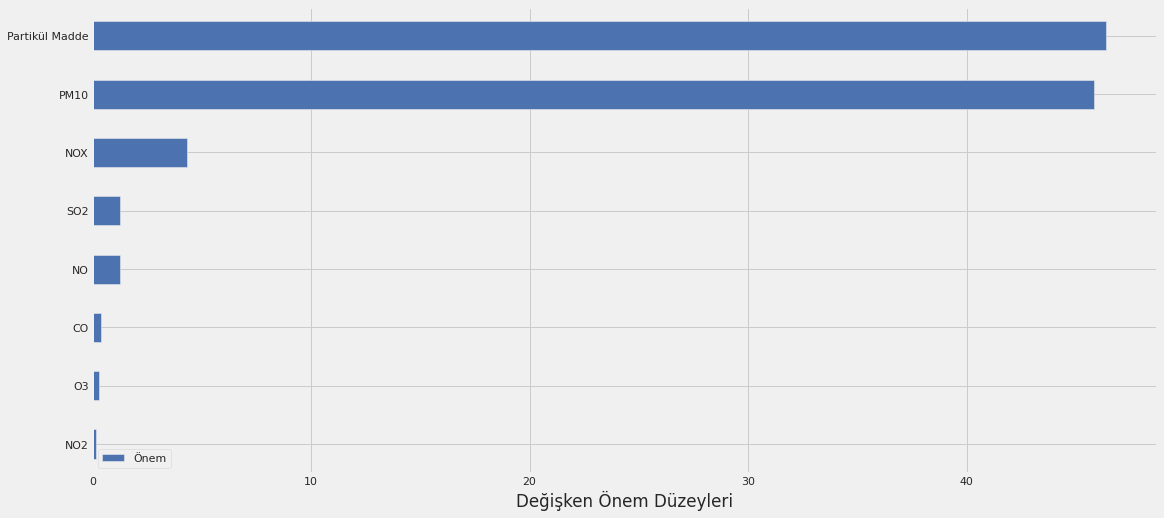

In [56]:
Importance.sort_values(by = "Önem", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Değişken Önem Düzeyleri")

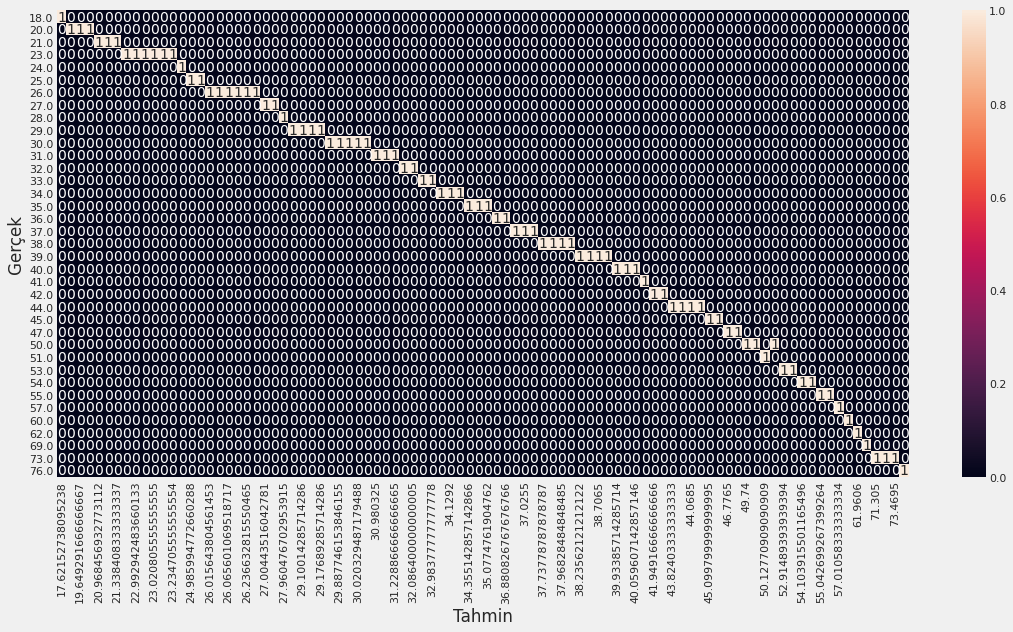

In [57]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'Gerçek':    list(y_test),
        'Tahmin': list(y_pred)
        }

a_veri = pd.DataFrame(data, columns=['Gerçek','Tahmin'])
confusion_matrix = pd.crosstab(a_veri['Gerçek'], a_veri['Tahmin'], rownames=['Gerçek'], colnames=['Tahmin'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [58]:
a_veri.head()

,Gerçek,Tahmin
0,20.0,19.649292
1,44.0,43.824033
2,34.0,34.129200
3,36.0,36.880827
4,31.0,31.228867


In [59]:
a_veri = pd.concat([akcaabatVerisi['Tarih'], a_veri], axis=1, sort=False)

In [61]:
a_veri = a_veri.dropna()

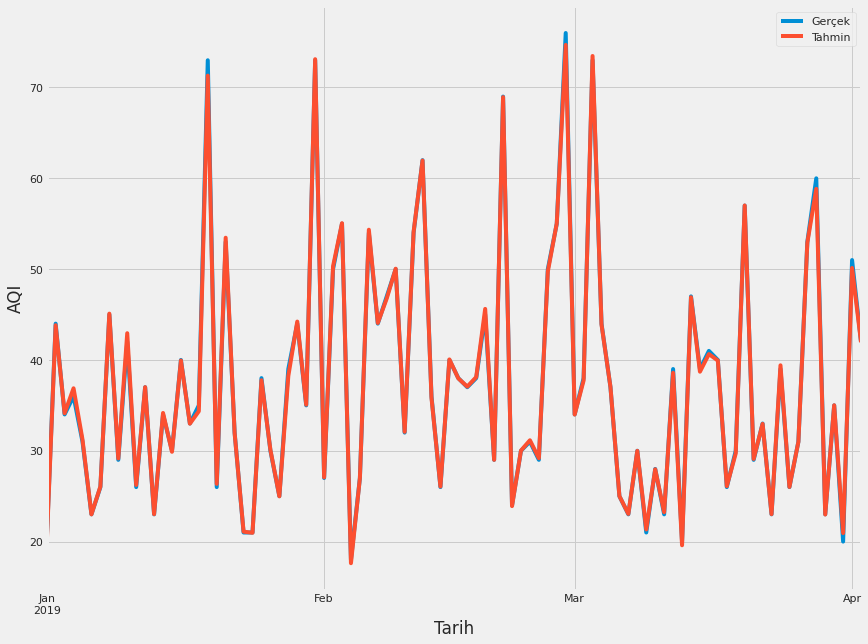

In [62]:
a_veri=a_veri.set_index('Tarih')
a_veri.sort_values(by='Tarih',ascending=False)
a_veri.plot(figsize=(13, 10))
plt.ylabel("AQI")
y=a_veri.Gerçek

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [64]:
dt_model.predict(X_test)[0:5]
y_pred = dt_model.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.7476692553475204

In [66]:
dt_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}


In [67]:
dt_model = DecisionTreeClassifier(random_state = 42)

In [68]:
dt_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [69]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [70]:
dt_cv_model.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 1000}

In [71]:
dt_tuned = DecisionTreeClassifier(max_depth  = 8, 
                                 max_features = 5)

In [72]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
y_pred = dt_tuned.predict(X_test)

In [74]:
dt_tuned.score(X_test,y_test)

0.6521739130434783

In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.573757004950782

In [80]:
Importance = pd.DataFrame({"Önem": rf_tuned.feature_importances_*100},
                         index = X_train.columns)


Text(0.5, 0, 'Değişken Önem Düzeyleri')

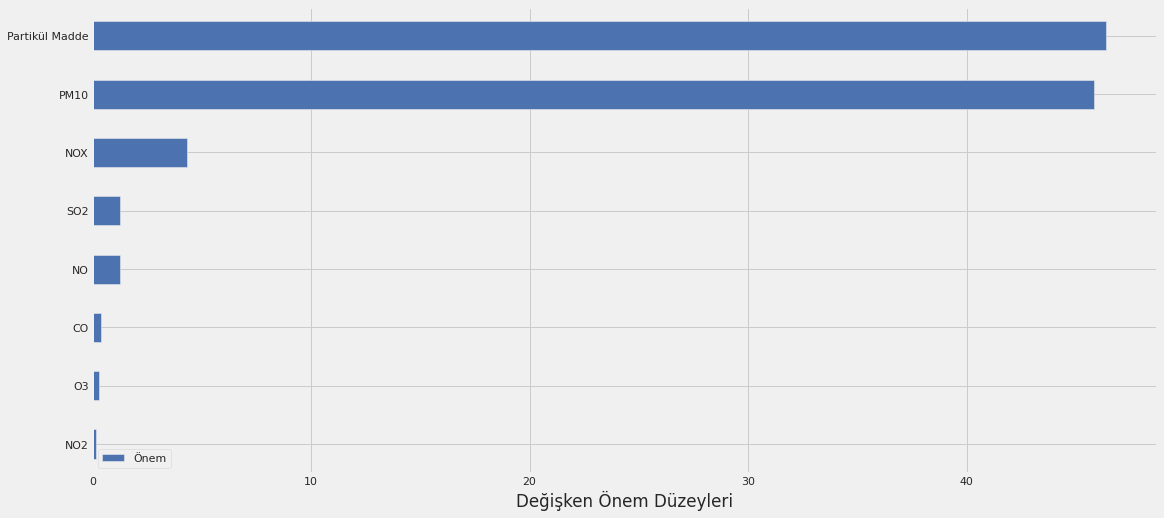

In [82]:
Importance.sort_values(by = "Önem", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Değişken Önem Düzeyleri")


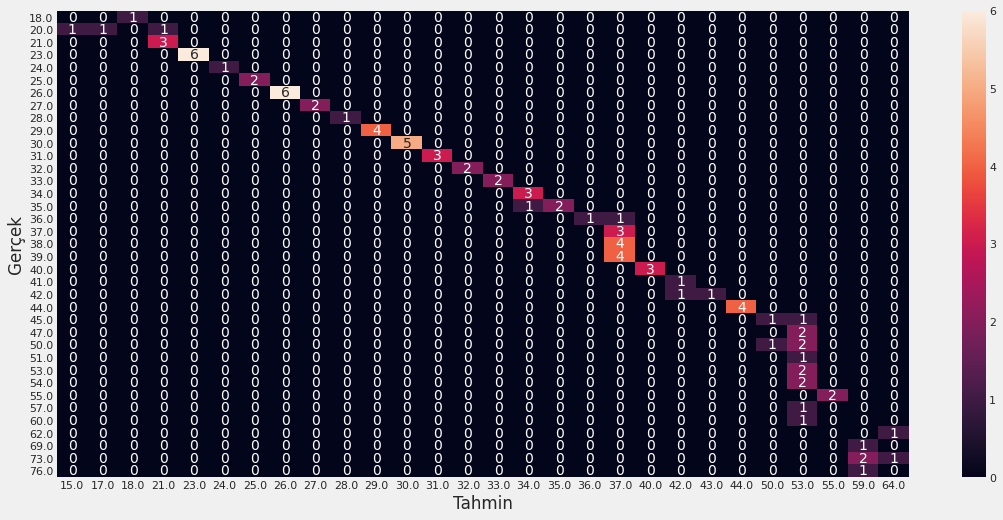

In [83]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'Gerçek':    list(y_test),
        'Tahmin': list(y_pred)
        }

df = pd.DataFrame(data, columns=['Gerçek','Tahmin'])
confusion_matrix = pd.crosstab(df['Gerçek'], df['Tahmin'], rownames=['Gerçek'], colnames=['Tahmin'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [84]:
df.head()

,Gerçek,Tahmin
0,20.0,15.0
1,44.0,44.0
2,34.0,34.0
3,36.0,37.0
4,31.0,31.0


In [89]:
a_veri = pd.concat([akcaabatVerisi['Tarih'], df], axis=1, sort=False)

In [90]:
a_veri["Tarih"] = pd.to_datetime(a_veri["Tarih"])

In [91]:
a_veri = a_veri.dropna()

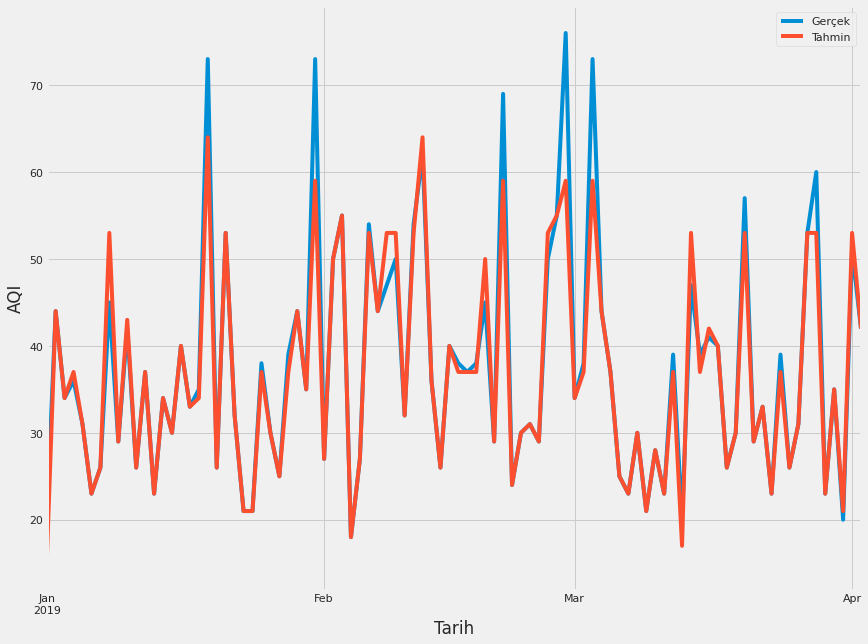

In [92]:
a_veri=a_veri.set_index('Tarih')
a_veri.sort_values(by='Tarih',ascending=False)
a_veri.plot(figsize=(13, 10))
plt.ylabel("AQI")
y=a_veri.Gerçek